![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [71]:
!pip install livelossplot

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


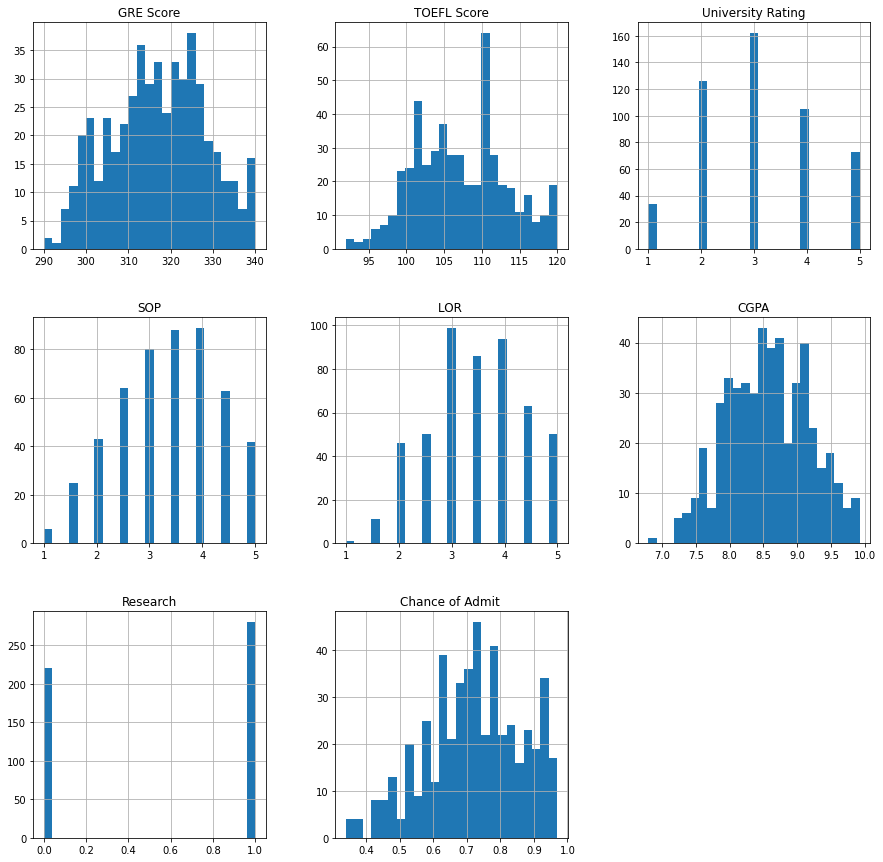

In [75]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [76]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [93]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)



## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [94]:
#Preparación de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTest = np.array(xTest)
yTest = np.array(yTest)

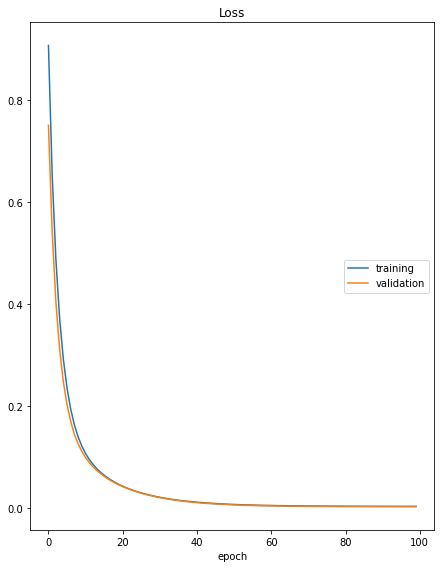

Loss
	training         	 (min:    0.004, max:    0.906, cur:    0.004)
	validation       	 (min:    0.003, max:    0.750, cur:    0.003)
11/11 [==============================] - 0s 26ms/step - loss: 0.0039 - val_loss: 0.0031


In [79]:
# Celda 1
from livelossplot import PlotLossesKeras
model = Sequential()
model.add(Dense(1, input_shape = (xTrain.shape[1],)))
lf = keras.losses.MeanSquaredError()
#lf = keras.losses.Huber()
model.compile(optimizer='sgd', loss=lf)
# model.compile(optimizer='adam', loss=lf) // NO UTILIZADO
#Justificación de el uso de SGD versus ADAM: aunque Adam es adaptativo, para este caso, SGD presenta una menor carga computacional sin la necesidad de optimizar el learning rate.
#Justificacion del uso de mean_squared_error: Debido al tipo de problema es un ejercicio de regresión, se decide utilizar mean_squared_error con el objetivo de penalizar los errores grandes sobre los pequeños. 


callback_epochs = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='def/model.{epoch:02d}-{val_loss:.5f}.h5', save_best_only=True),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), callback_epochs])

In [80]:
yPred = model.predict(xTest)

In [82]:



yPredtest = model.predict(xTest)
yPredtrain = model.predict(xTrain)



maetest = np.mean(np.abs(yTest - yPredtest))## Calculo del error absoluto medio en el set de Test.
maetrain =np.mean(np.abs(yTrain - yPredtrain)) ## Calculo del error absoluto medio en el set de Train

print("MAETEST:", maetest)
print("MAETRAIN:", maetrain)

msetest =  np.mean((yTest - yPredtest)**2) # Calculo del error cuadratico medio en el set de Test.
msetrain =  np.mean((yTrain - yPredtrain)**2) #Calculo del error cuadratico medio en el set de Train.

print("MSETEST:" , msetest)  
print("MSETRAIN:" , msetrain)
#CONCLUSION:

#SE EVIDENCIA QUE LAS FUNCIONES DE COSTO ARROJAN VALORES SIMILARES EN LOS DATOS DE ENTRENAMIENTO Y PRUEBA POR LO TANTO SE PUEDE CONCLUIR QUE NO HAY SOBREAJUSTE

error absoluto medio (MAE):  0.041139566977818814
error cuadrático medio (MSE):  0.0031305743463404525
MAETEST: 0.1592142567161984
MAETRAIN: 0.15134172891021264
MSETEST: 0.03913571857368624
MSETRAIN: 0.03483980702254869


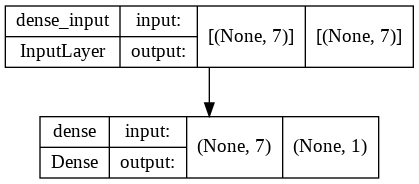

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='layers_plot.png', show_shapes=True, show_layer_names=True)

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

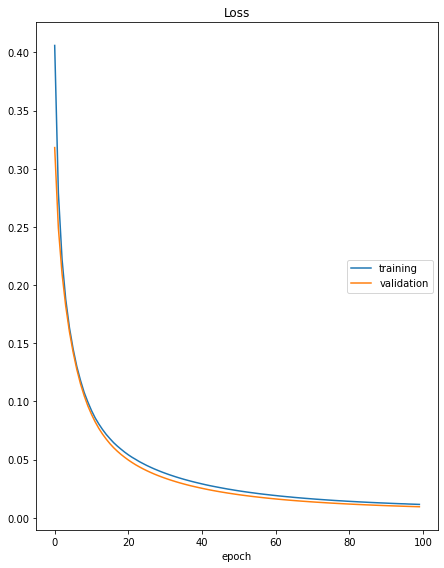

Loss
	training         	 (min:    0.012, max:    0.406, cur:    0.012)
	validation       	 (min:    0.010, max:    0.318, cur:    0.010)
11/11 [==============================] - 0s 28ms/step - loss: 0.0115 - val_loss: 0.0095


In [84]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(xTrain.shape[1], input_shape=(xTrain.shape[1],),activation='sigmoid'))
model.add(Dense(1, input_shape=(xTrain.shape[1],)))


lf = keras.losses.MeanSquaredError()
#lf = keras.losses.Huber()
model.compile(optimizer='sgd', loss=lf)
# model.compile(optimizer='adam', loss=lf) // NO UTILIZADO
#Justificación de el uso de SGD versus ADAM: aunque Adam es adaptativo, para este caso, SGD presenta una menor carga computacional sin la necesidad de optimizar el learning rate.
#Justificacion del uso de mean_squared_error: Debido al tipo de problema es un ejercicio de regresión, se decide utilizar mean_squared_error con el objetivo de penalizar los errores grandes sobre los pequeños. 
#Se utilizan las mismas que funciones de pérdida, optimizardor y épocas que en la caso anterior para comparar mejor los resultados

callback_epochs = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='def/model.{epoch:02d}-{val_loss:.5f}.h5', save_best_only=True),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), callback_epochs])


In [85]:
yPredtest = model.predict(xTest)
yPredtrain = model.predict(xTrain)



maetest = np.mean(np.abs(yTest - yPredtest))## Calculo del error absoluto medio en el set de Test.
maetrain =np.mean(np.abs(yTrain - yPredtrain)) ## Calculo del error absoluto medio en el set de Train

print("MAETEST:", maetest)
print("MAETRAIN:", maetrain)

msetest =  np.mean((yTest - yPredtest)**2) # Calculo del error cuadratico medio en el set de Test.
msetrain =  np.mean((yTrain - yPredtrain)**2) #Calculo del error cuadratico medio en el set de Train.

print("MSETEST:" , msetest)  
print("MSETRAIN:" , msetrain)
#CONCLUSION:

#SE EVIDENCIA QUE LAS FUNCIONES DE COSTO ARROJAN VALORES SIMILARES EN LOS DATOS DE ENTRENAMIENTO Y PRUEBA POR LO TANTO SE PUEDE CONCLUIR QUE NO HAY SOBREAJUSTE, INCLUSO SE EVIDENCIA UNA SIMILITUD AUN MAYOR ENTRE EL CONJUNTO
#DE PRUEBA Y ENTRENAMIENTO QUE CUANDO HAY UNA SOLA CAPA.

MAETEST: 0.15780388012059532
MAETRAIN: 0.15875810665696982
MSETEST: 0.03832463193693738
MSETRAIN: 0.03841107553411434


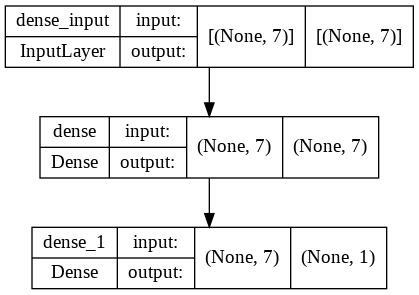

In [ ]:

plot_model(model, to_file='layers_plot.png', show_shapes=True, show_layer_names=True)

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

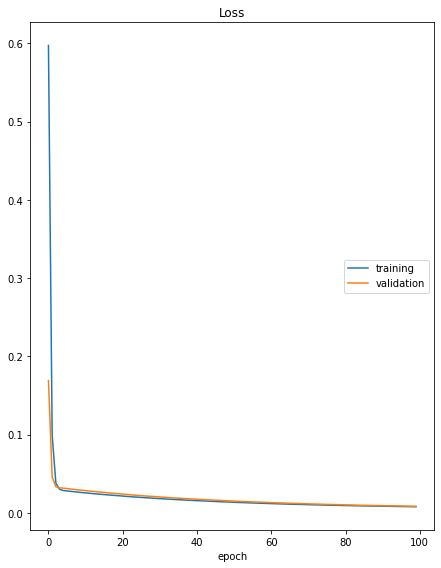

Loss
	training         	 (min:    0.008, max:    0.597, cur:    0.008)
	validation       	 (min:    0.008, max:    0.169, cur:    0.008)
11/11 [==============================] - 0s 26ms/step - loss: 0.0079 - val_loss: 0.0085


In [95]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(xTrain.shape[1]*2, input_shape=(xTrain.shape[1],),activation='sigmoid'))
model.add(Dense(xTrain.shape[1]*2, activation='sigmoid'))
model.add(Dense(1))


lf = keras.losses.MeanSquaredError()
#lf = keras.losses.Huber()
model.compile(optimizer='sgd', loss=lf)
# model.compile(optimizer='adam', loss=lf) // NO UTILIZADO
#Justificación de el uso de SGD versus ADAM: aunque Adam es adaptativo, para este caso, SGD presenta una menor carga computacional sin la necesidad de optimizar el learning rate.
#Justificacion del uso de mean_squared_error: Debido al tipo de problema es un ejercicio de regresión, se decide utilizar mean_squared_error con el objetivo de penalizar los errores grandes sobre los pequeños. 
#Se utilizan las mismas que funciones de pérdida, optimizardor y épocas que en la caso anterior para comparar mejor los resultados

callback_epochs = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='def/model.{epoch:02d}-{val_loss:.5f}.h5', save_best_only=True),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), callback_epochs])

In [96]:
yPredtest = model.predict(xTest)
yPredtrain = model.predict(xTrain)



maetest = np.mean(np.abs(yTest - yPredtest))## Calculo del error absoluto medio en el set de Test.
maetrain =np.mean(np.abs(yTrain - yPredtrain)) ## Calculo del error absoluto medio en el set de Train

print("MAETEST:", maetest)
print("MAETRAIN:", maetrain)

msetest =  np.mean((yTest - yPredtest)**2) # Calculo del error cuadratico medio en el set de Test.
msetrain =  np.mean((yTrain - yPredtrain)**2) #Calculo del error cuadratico medio en el set de Train.

print("MSETEST:" , msetest)  
print("MSETRAIN:" , msetrain)
#CONCLUSION:

#SE EVIDENCIA QUE LAS FUNCIONES DE COSTO ARROJAN VALORES SIMILARES EN LOS DATOS DE ENTREANEMIENTO Y PRUEBA POR LO TANTO SE PUEDE CONCLUIR QUE NO HAY SOBREAJUSTE

MAETEST: 0.13031162130694918
MAETRAIN: 0.1268780257135119
MSETEST: 0.026619004455178032
MSETRAIN: 0.024265464463165413


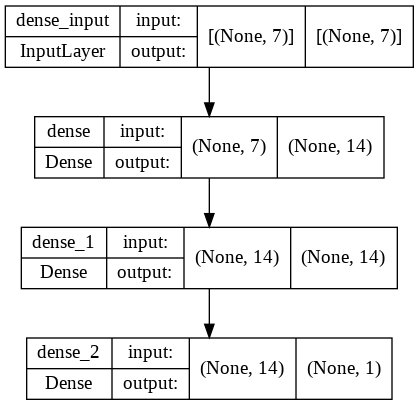

In [ ]:

plot_model(model, to_file='layers_plot.png', show_shapes=True, show_layer_names=True)

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 4

#COMO LA EVIDENCIAN LAS FUNCIONES DE COSTO MAE, MSE A MEDIDA QUE SE AGREGAN CAPAS, EL COSTO O PERDIDA GLOBAL DISMINUYE, TANTO EN EL SET DE ENTRENAMIENTO COMO EL DE MUESTRA EN NINGUN CASO FUE NECESARIO REALIZAR REGULARIZACION, U
#OTRO METODO PARA CORREGIR EL SOBRE AJUSTE, COMO ERA DE ESPERARSE EL MEJOR MODELO RESULTO SER LA RED MULTICAPA YA QUE LA PRESENCIA DE VARIOS PERCEPTRONES PERMITE LA CREACION DE UN MODELO NO LINEAL MAS COMPLEJO, ADEMAS EL COSTO
#CMPUTACIONAL ADICIONAL, QUE SE REQUIRIO AL AGREGAR LAS CAPAS ADICIONALES NO FUE SIGNIFICATIVO. LA RECOMENDACION EN ESTE CASO ES UTILIZAR LA RED MULTICAPA.
